 # Step3 演習 04 カラー画像の配列を学ぶ
 ---

本演習では、カラー画像の仕組みについて、プログラムと交えて学習します。

普段利用するスマートフォンで撮った写真などがどのような仕組みで表現されているのか、プログラムの視点で確認していきたいと思います。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での利用は避けてください。

**本演習の目的** 
- 色の表現を確認する。
- プログラムでカラー画像の配列を確認する。
- ニューラルネットワークで数字のカラー画像を学習・分類してみる。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [OpneCV](https://opencv.org/) 画像処理ライブラリのドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番**に順次実行してください。

**注意**： 初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## カラー画像の構造

画像データは「 画素（ピクセル：pixel） 」の集合で、ピクセル単位の小さいさまざまな色が繋がることで画像になっています。

画素（以下 ピクセル）とは、画像を構成する情報の単位です。

例えば、スマートフォンで画像を拡大すると浮き出てくる、1色の小さい正方形をイメージするといいと思います。

またピクセルは3色の値 赤（Red）・緑（Green）・青（Blue） で構成されます。

ピクセルの集合の画像データはデータの連続、つまり配列です。

ピクセルがRGBの配列から構成されるということは、画像データはRGBの配列から構成されるということです。

RGB（またはRGBカラーモデル）などの色を表現する方法（フォーマット）はいくつか種類があり、一般的に BGR や BGRA、または RGB や RGBA で表現されます。 

例えば、色の表現として、**光の三原色**や**色の三原色**という言葉を聞いたことがあると思います。

赤・緑・青は光の三原色で、RGBとは色の表現法の一種で、赤（Red）、緑（Green）、青（Blue） の3つの原色を混ぜて幅広い色を作る加法混合の一種です。各色が混ざると明るくなり白に近づいていきます。

テレビ画面やパソコンのモニターなどのように物体自身が発光しているものは光の三原色で色が作られています。

まずは下のカラー画像を使って学習を進めていきます。

<div align="center"  style="width:35%">
<img src="./img/step3_rgb_colors.png"></div>

**画像を読み込む**

In [2]:
# OpenCVを使って画像を読み込む
img = cv2.imread('./img/step3_rgb_colors.png')

**画像を表示**

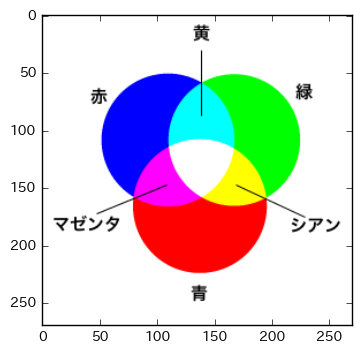

In [3]:
#読み込んだ画像を表示
plt.imshow(img)
plt.show()

よく観察してください。先ほど確認した画像の文字と実際の色の関係が異なっています。

ここで気をつけて欲しいのは、ライブラリ OpenCV を使って画像を読み込んだ場合、データのフォーマットがRGBではなくBGRとなっているので注意が必要です。両者の違いは配列の順番です。

BGRをRGBに変換するには以下の関数を使います。

In [4]:
#BGRをRGBに変換
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

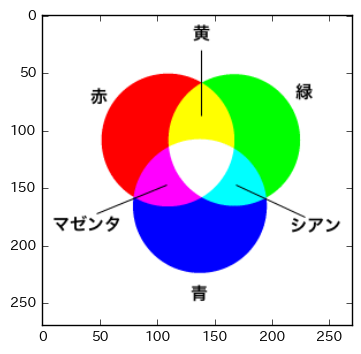

In [5]:
plt.imshow(img_rgb)
plt.show()

色と文字の関係が一致しました。

このようにライブラリによって、色の表現の順序が異なります。

各ライブラリのドキュメントをきちんと確認し、注意して利用するようにしましょう。

さて、今回利用する画像の配列（shape）を確認してみます。

In [6]:
#画像（イメージ）の配列の形を確認してみましょう
img_rgb.shape

(270, 270, 3)

「 縦:270 x 横:270 x チャネル:3 」の3次元配列になっています。

また RGB 画像には、赤、緑、青の順に 3 つのチャネルがあります。

次に、この画像の配列の中身を確認してみましょう。

In [7]:
#画像（イメージ）のデータの中身を確認してみましょう
img_rgb

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

ほとんどの値が255になっていると思います。差がわかりずらいので、別の部分をのぞいてみましょう。

下のセルを実行してください。

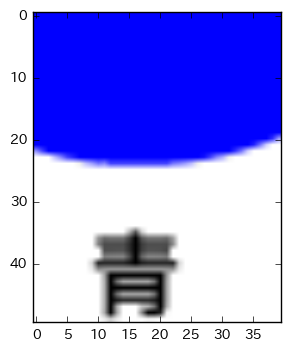

In [8]:
#指定範囲の画像を表示
plt.imshow(img_rgb[200:250,120:160,:])
plt.show()

In [9]:
#上で表示した画像部分の配列を確認
img_rgb[200:250,120:160,:]

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

画像データは整数（0~255）であることが分かります。「dtype=uint8」とは8 ビットの符号なし整数（unsigned integer）という意味です。

つまり、8ビットの範囲で表現できる正の整数を扱えます。

2の8乗は256なので、0~255までを表現できます。先ほど確認したカラー画像の色を表現しています。

**チャネル毎に画像を表示**

では、チャネル単位で画像を表示させてみます。

１チャネルになるので**グレースケール**の画像になります。

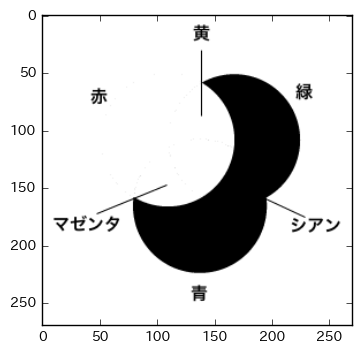

In [9]:
#　Red チャネル
plt.imshow(img_rgb[:,:,0], cmap='gray') #チャネル0を指定。「:」は全てという意味
plt.show()

画像の中の色が黒い部分の配列の値を確認してみます。下のセルを実行してください。

In [10]:
#画像の色が黒の場所のデータ
img_rgb[:,:,0][150, 200]

0

色が白い部分の配列の値を確認してみます。下のセルを実行してください。

In [11]:
#画像の色が白の場所のデータ
img_rgb[:,:,0][100, 100]

255

**グレースケール**の画像データは、

- 白：255
- 黒：0

となっていることがわかります。

残りの 「Green チャネル」と「Blue チャネル」 も確認します。

下のセルを実行してください。

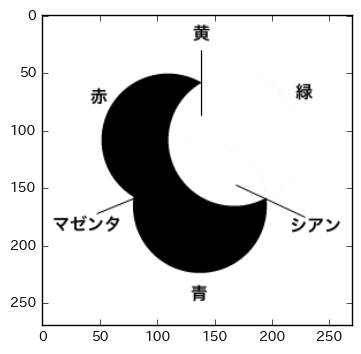

In [12]:
#　Green チャネル
plt.imshow(img_rgb[:,:,1], cmap='gray') #チャネル1を指定。「:」は全てという意味
plt.show()

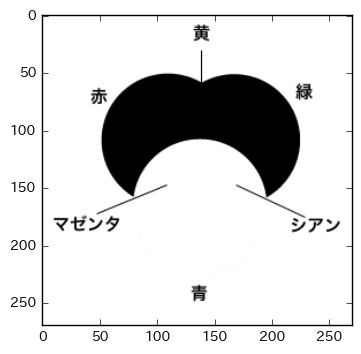

In [13]:
#　Blue チャネル
plt.imshow(img_rgb[:,:,2], cmap='gray') #チャネル2を指定。「:」は全てという意味
plt.show()

### データ構造

これまでプログラムで確認してきたRGBがどのような配列構造になっているのか下の画像で確認しましょう。

- 左側には4×4ピクセルのRGBのカラー画像のイメージ
- 右側にはカラー画像のデータ構造（配列）のイメージ


<div align="center"  style="width:100%">
<img src="./img/step3_data_stracture.png"></div>

このようにカラー画像は、RGBチャネルを組み合わせることで表現されているのです。

### 3×3のカラーマップを自力で表示してみよう！

"赤" や "マゼンダ" など記述されている部分を書き換えて、NumPyの配列を作成し、変数 `rgb_image_` に格納してください。

**ヒント**
- 例えば、赤は [255, 0, 0] と記述します。

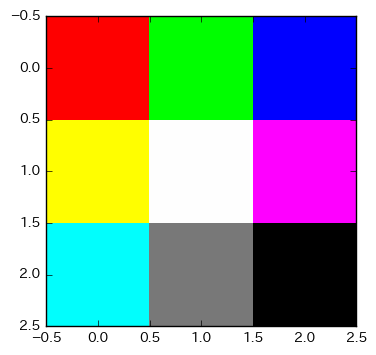

In [14]:
rgb_image_ = np.array([
    [[255,0,0], [0,255,0], [0,0,255]],
    [[255,255,0], [255,255,255], [255,0,255]],
    [[0,255,255], [120,120,120], [0,0,0]],
], dtype = np.uint8)

#画像の表示
plt.imshow(rgb_image_, interpolation='none')
plt.show()

**参考資料**

<div align="center"  style="width:100%">
<img src="./img/step3_colormap.png"></div>

---

**模範回答**

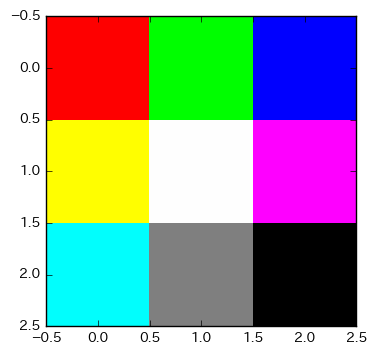

In [15]:
rgb_image_ = np.array([
    [[255,  0,  0],[  0,255,  0],[  0,  0,255]],
    [[255,255,  0],[255,255,255],[255,  0,255]],
    [[  0,255,255],[127,127,127],[  0,  0,  0]],
], dtype = np.uint8)

#画像の表示
plt.imshow(rgb_image_, interpolation='none')
plt.show()

**まとめ**

RBGは、赤（Red）・緑(Green)・青(Blue)で、配列データを組み合わせることで色を表現しています。

カラー画像は３つのチャネルのデータで、さまざまな色を表現しています。

また、代表カラーである赤緑青を混ぜ合わせた結果、下記のような色の表現することができます。

- <font color='red'>赤<font color='black'>＋<font color='green'>緑<font color='black'>＝<font color='yellow'>黄
- <font color='green'>緑<font color='black'>＋<font color='blue'>青<font color='black'>＝<font color='#00ffff'>シアン
- <font color='red'>赤<font color='black'>＋<font color='blue'>青<font color='black'>＝<font color='ff00ff'>マゼンタ
- <font color='green'>緑<font color='black'>＋<font color='red'>赤<font color='black'>＋<font color='blue'>青<font color='black'>＝白

## カラー画像の数字の分類タスクを行うモデルを作ってみる

ニューラルネットワークの学習で、これまで扱ってきたデータセットはすべて白黒画像の手書き数字（MNIST）でした。

ここでは、ニューラルネットワークでカラー（赤・緑・青）の数字データを分類するタスクを行ってみたいと思います。

０〜７の数字の画像データ 縦：10 × 横：10ピクセルで訓練します。

### データセットの準備

下のセルには０と１で人為的に作られた数字０~７の配列（辞書型）を用意しました。

そのまま実行してください。

In [16]:
n = {0:[0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
     
     1:[0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
     
     2:[0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
     
      3:[0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
     
      4:[0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
          0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0],

      5:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0],

      6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    
      7:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

**数字データを確認**

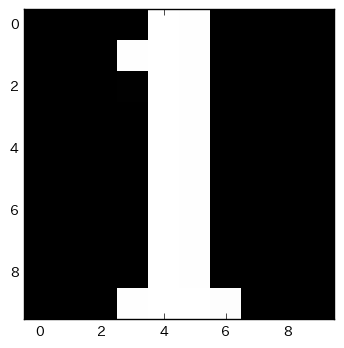

In [17]:
number = np.array(n[1]) #n[]のカッコ内の数字を0~7に変えてみよう。
number = number.reshape(10, 10, 1) #10×10pxに変換
plt.imshow(number[:,:,0], cmap = 'gray', interpolation='none')
plt.show()

このままでは１チャネルの画像データのためカラー画像を表現することができません。そこで、３次元空間へと画像を加工します。

下のセルを実行してください。

In [18]:
#Coursedele-02 Step3 QuestionNumber6 bcb962e4445a43f2142eec1aca5e02f0
#【課題１】
num_data = 5 #数字を指定
img_color = np.array(n[num_data]) #準備したデータセットを呼び出し、変数 img_color に格納
img_color[img_color==1]=255 #条件が成立した場合（ここでは要素の値が１の場合）、値を255に変換する

#チャネルごとの配列を作成
img_color_r = np.array(img_color, dtype = np.uint8) 
img_color_g = np.array(img_color, dtype = np.uint8)
img_color_b = np.array(img_color, dtype = np.uint8)

# 右側の "255" の値を変えることで色の情報を変更
###############START CODE HERE###############
img_color_r[img_color_r==255] = 0 #Redチャネル：値を変更することでチャネル毎の情報を変更
img_color_g[img_color_g==255] = 255 #Greenチャネル：値を変更することでチャネル毎の情報を変更
img_color_b[img_color_b==255] = 0 #Blueチャネル：値を変更することでチャネル毎の情報を変更
################END CODE HERE################

#10×10×1の配列に変換
img_color_r = img_color_r.reshape(10, 10, 1)
img_color_g = img_color_g.reshape(10, 10, 1)
img_color_b = img_color_b.reshape(10, 10, 1)

#　「np.concatenate」を使って、複数の配列を連結する
# 「axis」を通して、どの深さで連結するのか指定する
img_color_rgb = np.concatenate([img_color_r, img_color_g, img_color_b],  axis=2)

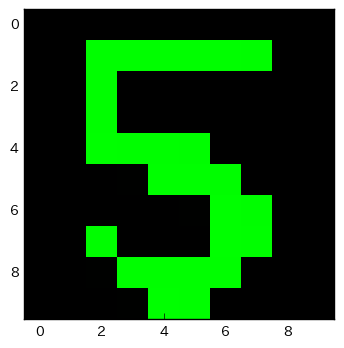

In [19]:
#画像を表示
plt.imshow(img_color_rgb, interpolation='none')
plt.show()

**【課題１】**上記のプログラムで表示する数字を緑色にするにはどうすれば良いか考えてみましょう。

**ヒント：**
- 255 を 0 に書き換えます。

In [20]:
%%bash
./validation_client.py dele-02 3 6 Step3_04.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### データセットを作成

変数 data にカラーの数字データを格納します。

下のセルをそのまま実行すると０〜７の数字の赤・緑・青のカラー画像の数字データを生成します。

In [21]:
data = []
color = {0:np.array([255,0,0]),
               1:np.array([0,255,0]),
               2:np.array([0,0,255])}

for q in range(8):    
    for i in range(3):
        t = np.array(n[q])
        t[t==1]=255

        t_r = np.array(t, dtype = np.uint8)
        t_g = np.array(t, dtype = np.uint8)
        t_b = np.array(t, dtype = np.uint8)

        t_r[t_r==255] = color[i][0]
        t_g[t_g==255] = color[i][1]
        t_b[t_b==255] = color[i][2]

        t_r = t_r.reshape(10, 10, 1)
        t_g = t_g.reshape(10, 10, 1)
        t_b = t_b.reshape(10, 10, 1)

        t_rgb = np.concatenate([t_r, t_g, t_b],  axis=2)

        data.append(t_rgb)

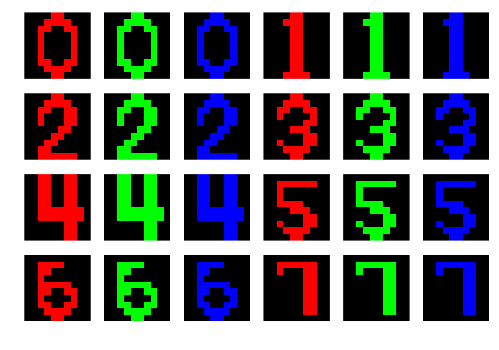

In [22]:
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.imshow(data[i], interpolation='none')
    plt.axis("off")
    plt.gray()
plt.show()

**数字データの可視化**

In [23]:
#変数 data の形を確認
np.array(data).shape

(24, 10, 10, 3)

In [24]:
color[0][0]

255

10×10×3のカラーの数字データを24個作成しました。

この画像データを使ってニューラルネットワークを学習し、数字を分類するモデルを作成してみましょう。

## ニューラルネットワークモデルを構築

**入力データ**

１枚の画像データは 10×10×3ピクセル で作られているため300個の情報を持っていることになります。

この画像データを変数 X_train に格納します。

In [25]:
#作成したデータセットを変数 X_train に格納
X_train = np.array(data)
X_train = X_train.reshape(24, 300)

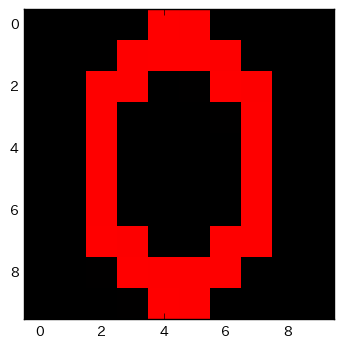

In [26]:
#画像を表示
plt.imshow(X_train.reshape(24, 10, 10, 3)[0], interpolation='none')

**正解ラベル**

In [27]:
#変数 y_train に正解ラベルを格納
y_train = np.array([[1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], 
                                  [0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1]])

In [28]:
y_train.shape

(24, 8)

In [29]:
y_train[0]

array([1, 0, 0, 0, 0, 0, 0, 0])

**正規化**

In [30]:
#データセットを正規化 最大値255で割ります。
X_train_ = (X_train) / 255

**ニューラルネットワークの構造**

In [31]:
# ニューラルネットワークの構造を決める
input_size = 300
hidden_size = 100
output_size = 10

**活性化関数**

ニューラルネットワークのモデルで利用する活性化関数を下記のように実装します。

- 隠れ層の活性化関数：ReLU関数
- 出力層の活性化関数：ソフトマックス関数

In [32]:
# relu関数
def relu(x):
    y = np.maximum(0, x)
    return y
    
#relu関数の微分
def relu_derivative(x):
    x[x>0] = 1
    x[x<=0] = 0
    return x

#ソフトマックス関数
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

**ニューラルネットワークのモデル**

下記の項目の関数を次のセルで実装します。

- initialize_parameters：パラメータの初期化
- forward_propagation：フォワードプロパゲーション
- compute_cost：コスト関数
- backward_propagation：バックプロパゲーション
- update_parameters：パラメータの更新
- accuracy：正解率

In [33]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.normal(scale=0.1, size=(input_size,hidden_size))
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.normal(scale=0.1, size=(hidden_size,output_size))
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    layer1_z = np.dot(X, W1) + b1
    layer1_a = relu(layer1_z)
    layer2_z = np.dot(layer1_a, W2) + b2
    layer2_a = softmax(layer2_z)
    return layer1_z, layer1_a, layer2_z, layer2_a

def compute_cost(y, y_hat, m):
    cost = - np.sum(y * np.log(y_hat) ) / m        
    return cost

def backward_propagation(X, y, W2, layer1_z, layer1_a, layer2_z, layer2_a, batch_size):
    derivative_layer2_z = (layer2_a - y) / batch_size 
    delta_W2 = np.dot(layer1_a.T, derivative_layer2_z)
    delta_b2 = np.sum(derivative_layer2_z, axis=0 ,keepdims=True) 
    derivative_layer1_z = np.dot(derivative_layer2_z, W2.T) * relu_derivative(layer1_z)
    delta_W1 = np.dot(X.T, derivative_layer1_z)
    delta_b1 = np.sum(derivative_layer1_z, axis=0 ,keepdims=True) 
    return delta_W2, delta_b2, delta_W1, delta_b1

def update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate):
    W1 = W1 - learning_rate * delta_W1
    b1 = b1 - learning_rate * delta_b1    
    W2 = W2 - learning_rate * delta_W2
    b2 = b2 - learning_rate * delta_b2
    return W1, b1, W2, b2

def accuracy(y, y_hat):
    accuracy = (np.argmax(y,axis=1) == np.argmax(y_hat,axis=1))
    accuracy = accuracy.mean()
    return accuracy

** ニューラルネットワークのモデルを構築**

ニューラルネットワークのモデルの関数 nn_model を下のセルに書いています。

そのまま実行してください。

In [34]:
# ニューラルネットワークのモデルを構築
def nn_model(X, y, input_size, hidden_size, output_size, epochs, sample_size, learning_rate,  print_cost=False):

    # コスト/精度を記録するための配列
    train_Data_cost = []
    train_Data_acc = []
    test_Data_cost = []
    test_Data_acc = []
    
    #エポックのカウントとパラメータを初期化
    count = 0    
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
     
    #エポック
    for i in range(epochs):

        #フォワードプロパゲーション
        layer1_z, layer1_a, layer2_z, layer2_a = forward_propagation(X, W1,b1,W2, b2)
        #バックプロパゲーション
        delta_W2, delta_b2, delta_W1, delta_b1 = backward_propagation(X, y, W2, layer1_z, layer1_a, layer2_z, layer2_a, sample_size)
        #パラメータの更新
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate)
        
        #訓練データのエポックごとのコスト値
        train_output = forward_propagation(X, W1,b1,W2, b2)
        train_cost = compute_cost(y, train_output[3], sample_size)
        train_Data_cost.append(train_cost)
        #訓練データのエポックごとの精度
        train_acc = accuracy(y, train_output[3])
        train_Data_acc.append(train_acc)

        #エポック数をカウント
        count += 1
        print('epochs：{0:.0f}'.format(int(count)), 'train cost：{0:.2f}'.format(train_cost),'train acc：{0:.2f}%'.format(train_acc*100))
    
    print("Finish Leaning!!")
    
    return train_Data_cost, train_Data_acc, W1, b1, W2, b2

関数 nn_model に渡す引数を定義します。

In [35]:
#モデルのパラメータを定義
input_size = 300
hidden_size = 50
output_size = 8
epochs = 50
sample_size = 24
learning_rate = 0.1

以下のセルを実行するとモデルの学習がはじまります。

In [36]:
train_Data_cost, train_Data_acc, W1, b1, W2, b2 = \
nn_model(X_train_, y_train, input_size, hidden_size, output_size, epochs, sample_size, learning_rate, print_cost=True)

epochs：1 train cost：2.08 train acc：16.67%
epochs：2 train cost：2.06 train acc：16.67%
epochs：3 train cost：2.04 train acc：16.67%
epochs：4 train cost：2.02 train acc：16.67%
epochs：5 train cost：2.00 train acc：25.00%
epochs：6 train cost：1.98 train acc：29.17%
epochs：7 train cost：1.96 train acc：37.50%
epochs：8 train cost：1.94 train acc：41.67%
epochs：9 train cost：1.92 train acc：41.67%
epochs：10 train cost：1.90 train acc：41.67%
epochs：11 train cost：1.88 train acc：41.67%
epochs：12 train cost：1.86 train acc：45.83%
epochs：13 train cost：1.84 train acc：50.00%
epochs：14 train cost：1.82 train acc：54.17%
epochs：15 train cost：1.80 train acc：54.17%
epochs：16 train cost：1.78 train acc：62.50%
epochs：17 train cost：1.76 train acc：62.50%
epochs：18 train cost：1.74 train acc：62.50%
epochs：19 train cost：1.72 train acc：62.50%
epochs：20 train cost：1.70 train acc：70.83%
epochs：21 train cost：1.68 train acc：75.00%
epochs：22 train cost：1.66 train acc：75.00%
epochs：23 train cost：1.64 train acc：75.00%
epochs：24 train cost

**モデルの出力と入力データ**

モデルの予想（出力） 1


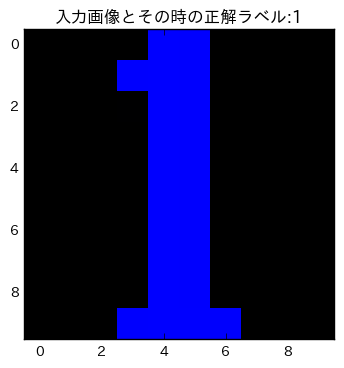

In [37]:
num = np.random.randint(0,24) #ランダムな数字を生成
output = forward_propagation(X_train[num], W1, b1, W2, b2) #学習済みのパラメータを使って訓練データの出力を確認
print(("モデルの予想（出力） {}".format(np.argmax(output[3]))))
plt.imshow(X_train.reshape(24, 10, 10, 3)[num], interpolation='none') #入力画像を表示
plt.title("入力画像とその時の正解ラベル:{}".format(np.argmax(y_train[num])))
plt.show()

**学習精度のグラフ**

エポックごとに学習精度が向上していく様子をプロットします。

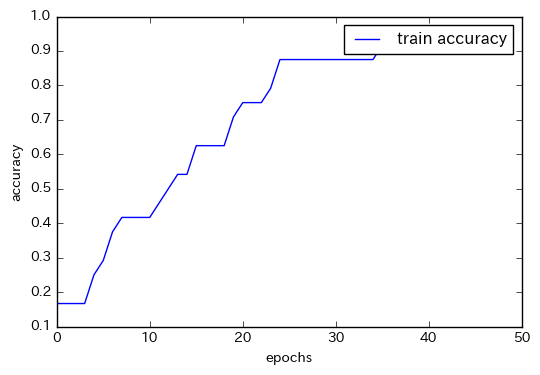

In [38]:
plt.plot(train_Data_acc, c='b', label='train accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()